# Bike Sharing Demand Assignment - By Prajwal Gunjikar

## Step - 1 Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
bikes_d = pd.read_csv("E:/UPGRAD/Machine learning 1/Module 2/day.csv")

In [4]:
# Checking the dataset

bikes_d.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Inspecting the various aspects of the dataframe**

In [5]:
#Checking the shape of dataset 

bikes_d.shape

(730, 16)

In [6]:
#summary of dataset

bikes_d.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#checking the info 

bikes_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Dropping the unwanted columns**

In [8]:
#Dropping the instant column as its just indexs of the columns. 
bikes_d.drop(['instant'],axis=1,inplace=True)
bikes_d.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#Dropping column dteday as it is not that informative as for the particular month we can refer the month column too.

bikes_d.drop(['dteday'],axis=1,inplace=True)
bikes_d.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#Dropping the column "casual" and "registerd" as they both have multicollinearity and also casual+registered=cnt
bikes_d.drop(['casual','registered'],axis=1,inplace=True)
bikes_d.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
#checking the datatype of all the columns 
bikes_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


**As the above information season,year,month,holiday.weekday,workingday,and wearthersit all are `categorical` variables but it's showing it as `int` thats incorrect.**

**we need to correct it by replacing it with appropriate values**

In [12]:
#checking the count of each season.
bikes_d['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
#Replacing the values of season as (1:"spring", 2:"summer", 3:"fall", 4:"winter")

bikes_d['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bikes_d.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
#checking the count of each season after replacing the values.
bikes_d['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
#checking the count of each mnth.
bikes_d['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [16]:
#Replacing the values of mnth as (1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec')

bikes_d['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
bikes_d.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
#checking the count of each mnth after replacing the values.
bikes_d['mnth'].value_counts()

Aug    62
Mar    62
May    62
Dec    62
Oct    62
Jan    62
Jul    62
Nov    60
Apr    60
Jun    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [18]:
#checking the count of each weathersit.
bikes_d['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [19]:
#Replacing the values of weathersit as (1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist')

bikes_d['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
bikes_d.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,1,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,2,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,3,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,4,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,5,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
#checking the count of each weathersit after replacing the values.
bikes_d['weathersit'].value_counts()

Clear_Few Clouds                      463
Mist_cloudy                           246
Light rain_Light snow_Thunderstorm     21
Name: weathersit, dtype: int64

In [21]:
#checking the count of each weekday.
bikes_d['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [22]:
#Replacing the values of weekday as (0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday")
bikes_d['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bikes_d.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
#checking the count of each weekday after replacing the values.
bikes_d['weekday'].value_counts()

Monday       105
Tuesday      105
Saturday     104
Wednesday    104
Sunday       104
Thursday     104
Friday       104
Name: weekday, dtype: int64

In [24]:
#Checking the dtype of the variables after the correction.
bikes_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


**Now it seems right, now lets move ahead with our analysis.**

## Step 2: Visualising the Data

#### Visualising Numeric Variables

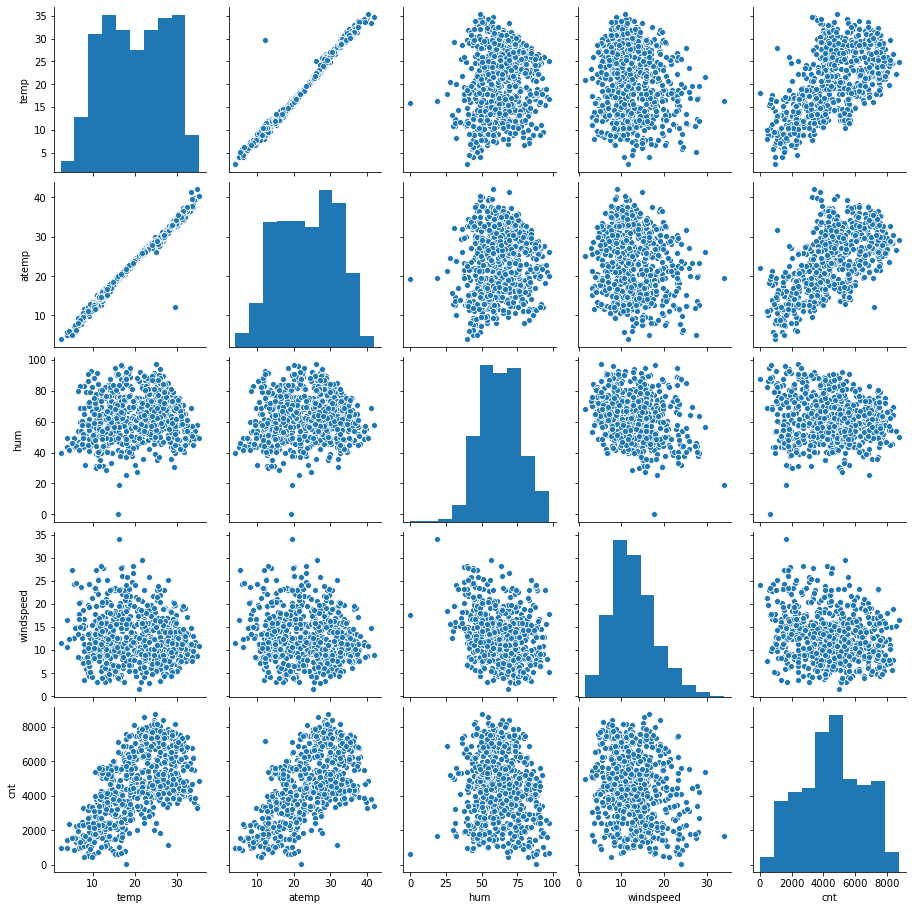

In [25]:
#using the pairplot to understand the numeric variables

sns.pairplot(bikes_d, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

By seeing the graph we can say that `temp` and `ateam` has nice repationship, for now lets move on and visualize categorical variables

#### Visualising Categorical Variables

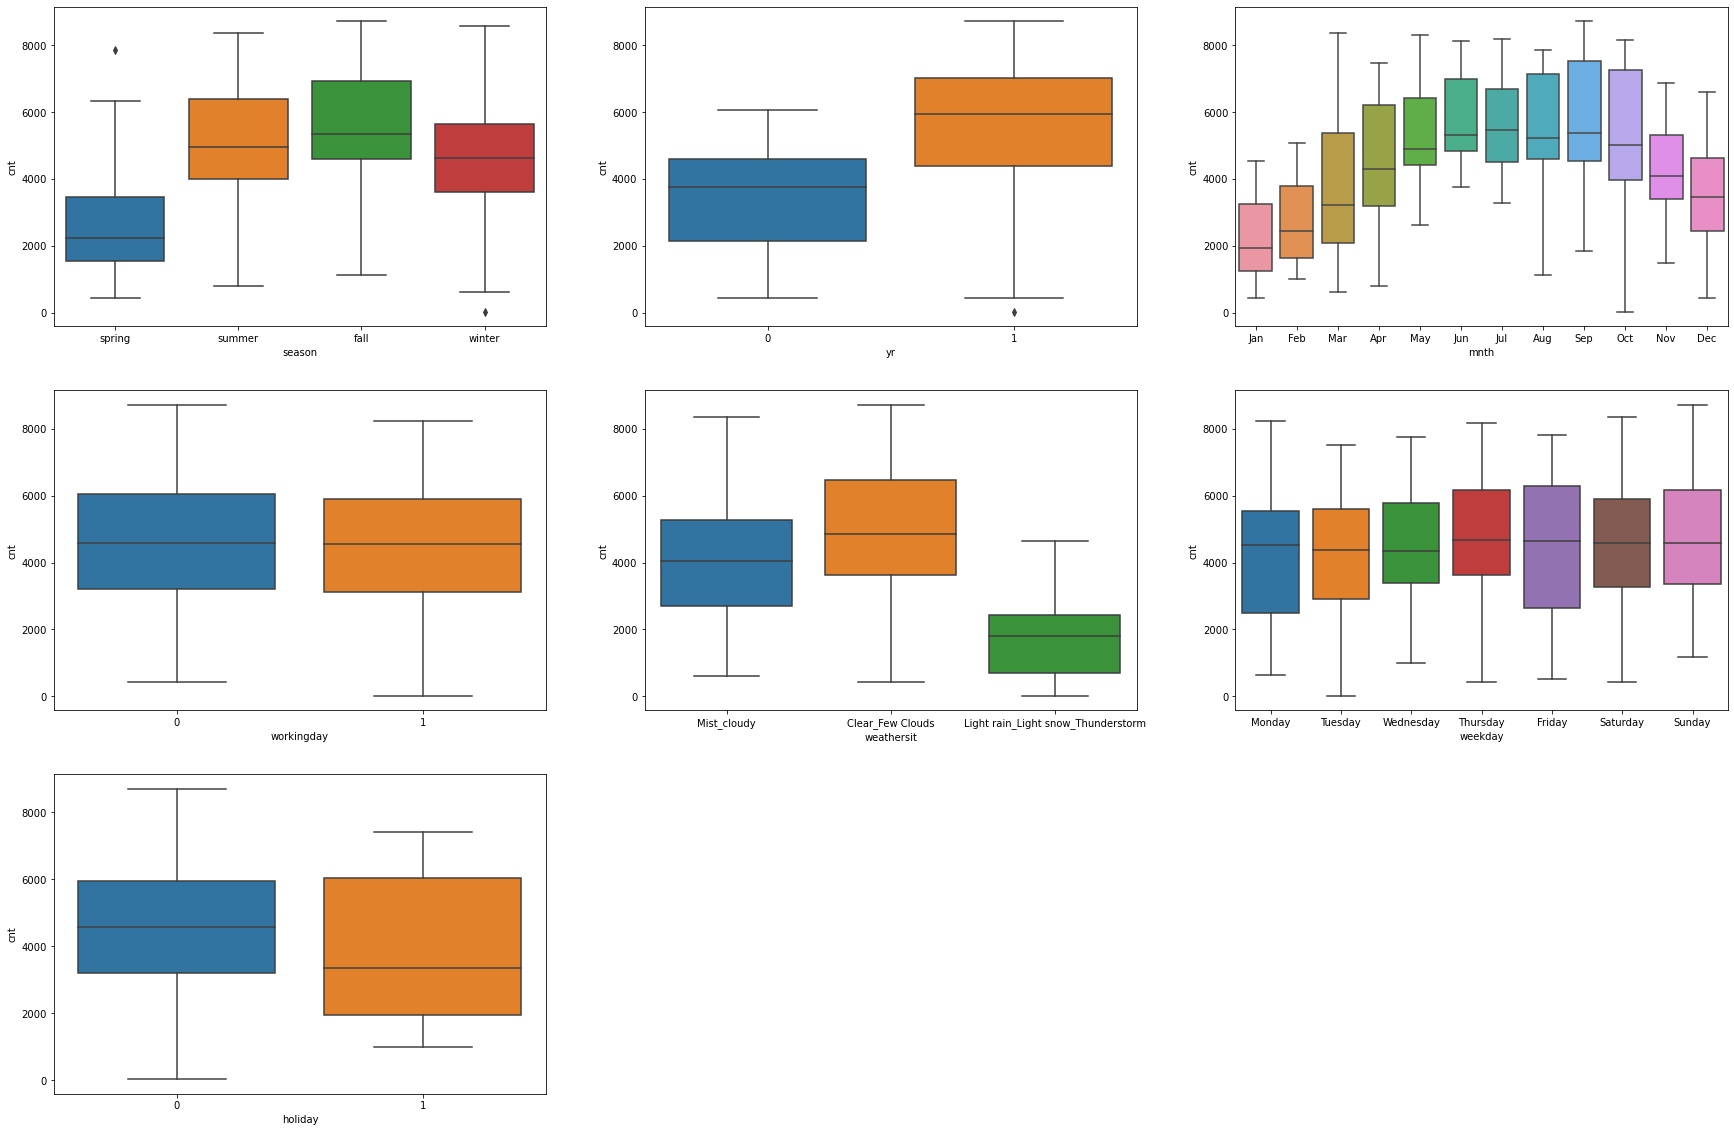

In [26]:
#Visualising categorical Variables using Boxplot.
plt.figure(figsize=(30, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes_d)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes_d)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes_d)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes_d)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_d)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes_d)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes_d)
plt.show()

We can see a lot of information here such as season `summer` and `fall` has high mean compared to others and this clearly shows 
that in season like summer and fall and with `Clear_Few Clouds` has good impact.

While Visualising numeric nariables we had noticed `temp` and `atemp` has a strong relation lets see the correlation between them

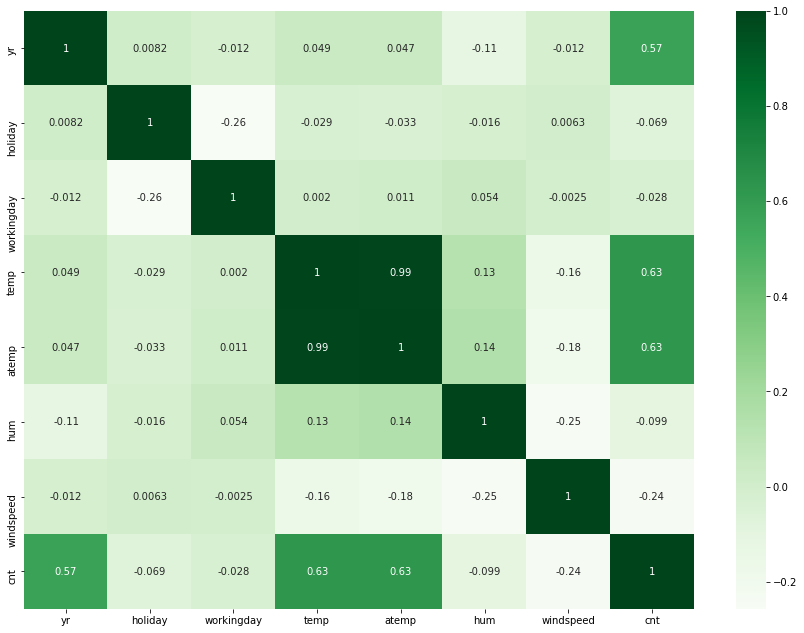

In [27]:
#Checking the correlation using the heatmap

plt.figure(figsize = (15, 11))
sns.heatmap(bikes_d.corr(), annot = True, cmap="Greens")
plt.show()

From the above heatmap we can see that `temp` and `atemp` highly correlated `0.99` and also with `cnt` both have similar correlation , so we can drop any one of them.

In [28]:
#Let us drop temp and consider atemp

bikes_d.drop(['temp'],axis=1,inplace=True)
bikes_d.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


## Step 3: Data Preparation

let's check the datatype of all the veriables 

In [29]:
bikes_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


Everything seems fine with datatype, now let's move on and create some dummy variables for categorical data.

### Dummy Variables

In [30]:
#Creating the dummy variables

season_dum = pd.get_dummies(bikes_d['season'],drop_first=True)

weathersit_dum = pd.get_dummies(bikes_d['weathersit'],drop_first=True)

weekday_dum = pd.get_dummies(bikes_d['weekday'],drop_first=True)

month_dum = pd.get_dummies(bikes_d['mnth'],drop_first=True)

In [31]:
# Adding the results to the original dataframe

bikes_d = pd.concat([bikes_d,season_dum],axis=1)

bikes_d = pd.concat([bikes_d,weathersit_dum],axis=1)

bikes_d = pd.concat([bikes_d,weekday_dum],axis=1)

bikes_d = pd.concat([bikes_d,month_dum],axis=1)

bikes_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  spring                              730 non-n

In [32]:
# Now let's see the head of our dataframe.

bikes_d.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Monday,1,Mist_cloudy,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tuesday,1,Mist_cloudy,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Wednesday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thursday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Friday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [33]:
# Dropping the orginal columns as we have created the dummies for it.

bikes_d.drop(['season'],axis=1,inplace=True)

bikes_d.drop(['weathersit'],axis=1,inplace=True)

bikes_d.drop(['weekday'],axis=1,inplace=True)

bikes_d.drop(['mnth'],axis=1,inplace=True)


In [34]:
# Now let's one more time see the head of our dataframe.

bikes_d.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Note to SME

**we are following the method which has been tought us in the `pre-assignment session`, we have been told that we need to create two sprate models one using manual method like ( stats or sklearn ) and find the best model in it and find its `RMSE`**.

**After that again we need to create another model using `RFE` method to prove this feature selecting method has helped us in the assignment**

**`This was the instruction we got in the Pre-Assignment session`**

## Step 4: Splitting the Data into Training and Testing Sets ( 1st Model )

In [35]:
#importing the train_test_split
from sklearn.model_selection import train_test_split

#specifying this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bikes_d_train1, bikes_d_test1 = train_test_split(bikes_d, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler=MinMaxScaler()

In [38]:
# Applying scaler() to all the columns except the 'categorical' and 'dummy' variables
num_vars=['atemp','hum','windspeed','cnt']

bikes_d_train1[num_vars] = scaler.fit_transform(bikes_d_train1[num_vars])

In [39]:
bikes_d_train1.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
bikes_d_train1.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the 1st model building

Following the method as told us in the `pre-assignmet session`, first using backward method to find best model and then using REF selecting the features automatically and finding the best model from it then comparing the both the model and finalizing the best model among both.

In [41]:
y_train_1 = bikes_d_train1.pop('cnt')
X_train_1 = bikes_d_train1

### Adding all the variables to the model

In [42]:
#Build a linear model

# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_1)

# Running the linear model
lr_1 = sm.OLS(y_train_1, X_train_lm).fit()

lr_1.params

const                                 0.418173
yr                                    0.232796
holiday                              -0.134343
workingday                           -0.066180
atemp                                 0.413709
hum                                  -0.151677
windspeed                            -0.165230
spring                               -0.050544
summer                                0.034246
winter                                0.105000
Light rain_Light snow_Thunderstorm   -0.249306
Mist_cloudy                          -0.060813
Monday                               -0.025870
Saturday                             -0.058571
Sunday                               -0.055693
Thursday                              0.003827
Tuesday                              -0.027085
Wednesday                            -0.011881
Aug                                   0.043863
Dec                                  -0.054394
Feb                                  -0.045560
Jan          

In [43]:
#Let's see the summary of our linear model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     96.22
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.89e-177
Time:                        15:59:47   Log-Likelihood:                 519.77
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     481   BIC:                            -858.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Looking at the P-values, it looks like some of the variables `aren't` really `significant` it's better we drop them but before dropping them lets check with `VIF` to see how collinear are independent variables.

### Checking VIF

In [44]:
#Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
#Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,63.15
4,hum,40.96
3,atemp,38.00
6,spring,13.52
8,winter,12.49
13,Sunday,12.20
12,Saturday,11.61
7,summer,9.82
25,Nov,7.15
26,Oct,6.96


### Dropping the variable and updating the model

Dropping the `Mar` variable because it has P-value of `0.956` which means it is insignificant

In [46]:
# Dropping highly correlated variables and insignificant variables

X = X_train_1.drop('Mar', 1,)

In [47]:
# Building the new model again
X_train_lm = sm.add_constant(X)

# Running the New model
lr_2 = sm.OLS(y_train_1, X_train_lm).fit()

In [48]:
#Let's see the summary of our linear model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     99.99
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.87e-178
Time:                        15:59:48   Log-Likelihood:                 519.77
No. Observations:                 510   AIC:                            -983.5
Df Residuals:                     482   BIC:                            -865.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping the `Mar` variable there is no changes in R-squred value, still there are many `insignificant` variables we need to drop them one by one

In [49]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,56.95
4,hum,40.35
3,atemp,37.42
8,winter,11.92
6,spring,11.56
13,Sunday,10.98
12,Saturday,10.52
7,summer,9.62
17,Aug,5.91
5,windspeed,5.55


### Dropping the Variable and Updating the Model

Dropping the `Oct` variable because it has P-value of `0.824` which means it is insignificant

In [50]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Oct', 1,)

In [51]:
# Building the new model again
X_train_lm = sm.add_constant(X)

# Running the New model
lr_3 = sm.OLS(y_train_1, X_train_lm).fit()

In [52]:
#Let's see the summary of our linear model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     104.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.86e-179
Time:                        15:59:48   Log-Likelihood:                 519.74
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     483   BIC:                            -871.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping the `Oct` variable there is no changes in R-squred value, still there are many `insignificant` variables we need to drop them one by one

In [53]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,55.72
4,hum,39.70
3,atemp,37.11
6,spring,11.16
13,Sunday,10.72
12,Saturday,10.25
8,winter,9.06
7,summer,8.28
5,windspeed,5.53
17,Aug,5.04


### Dropping the Variable and Updating the Model

Dropping the `Jul` variable because it has P-value of `0.587` which means it is insignificant

In [54]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Jul', 1,)

In [55]:
# Building the new model again

X_train_lm = sm.add_constant(X)

# Running the New model
lr_4 = sm.OLS(y_train_1, X_train_lm).fit()

In [56]:
#Let's see the summary of our linear model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     108.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.05e-180
Time:                        15:59:48   Log-Likelihood:                 519.58
No. Observations:                 510   AIC:                            -987.2
Df Residuals:                     484   BIC:                            -877.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping the `Jul` R-squred has changed slightly, still there are many `insignificant` variables we need to drop them one by one

In [57]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,51.97
4,hum,39.58
3,atemp,29.94
13,Sunday,9.87
12,Saturday,9.45
6,spring,7.43
5,windspeed,5.52
8,winter,5.27
7,summer,5.00
20,Jan,2.57


### Dropping the Variable and Updating the Model

Dropping the `Thursday` variable because it has P-value of `0.807` which means it is insignificant

In [58]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Thursday', 1,)

In [59]:
# Building the new model again
X_train_lm = sm.add_constant(X)

#Running our new model
lr_5 = sm.OLS(y_train_1, X_train_lm).fit()

In [60]:
#Let's see the summary of our linear model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     113.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.96e-181
Time:                        15:59:49   Log-Likelihood:                 519.55
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     485   BIC:                            -883.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping the `Thursday` variable there is no changes in R-squred value, still there are many `insignificant` variables we need to drop them one by one

In [61]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.00
4,hum,39.58
3,atemp,29.84
13,Sunday,9.87
12,Saturday,9.45
6,spring,7.43
5,windspeed,5.52
8,winter,5.26
7,summer,5.00
19,Jan,2.57


### Dropping the Variable and Updating the Model

Dropping the `Sunday` variable because it has P-value of `0.407` which means it is insignificant

In [62]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Sunday', 1,)

In [63]:
# Building the new model again
X_train_lm = sm.add_constant(X)

#Running our new model
lr_6 = sm.OLS(y_train_1, X_train_lm).fit()

In [64]:
#Let's see the summary of our linear model
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     118.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.51e-182
Time:                        15:59:49   Log-Likelihood:                 519.19
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     486   BIC:                            -888.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping the `Sunday` variable there is no changes in R-squred value, still there are many `insignificant` variables we need to drop them one by one.

In [65]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,34.28
3,atemp,19.64
2,workingday,7.45
6,spring,5.89
5,windspeed,4.82
8,winter,4.45
7,summer,3.98
18,Jan,2.40
10,Mist_cloudy,2.37
0,yr,2.11


### Dropping the Variable and Updating the Model

Dropping the `Saturday` variable because it has P-value of `0.792` which means it is insignificant

In [66]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Saturday', 1,)

In [67]:
# Building the new model again
X_train_lm = sm.add_constant(X)

#Running our new model
lr_7 = sm.OLS(y_train_1, X_train_lm).fit()

In [68]:
#Let's see the summary of our linear model
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.31e-183
Time:                        15:59:51   Log-Likelihood:                 519.15
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     487   BIC:                            -894.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping the `Saturday` variable there is no changes in R-squred value, still there are many `insignificant` variables we need to drop them one by one.

In [69]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,33.96
3,atemp,19.13
6,spring,5.76
2,workingday,5.16
5,windspeed,4.81
8,winter,4.40
7,summer,3.90
17,Jan,2.39
10,Mist_cloudy,2.36
0,yr,2.11


### Dropping the Variable and Updating the Model

Dropping the `workingday` variable because it has P-value of `0.486` which means it is insignificant.

In [70]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('workingday', 1,)

In [71]:
# Building the new model again
X_train_lm = sm.add_constant(X)

#Running our new model
lr_8 = sm.OLS(y_train_1, X_train_lm).fit()

In [72]:
#Let's see the summary of our linear model
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.54e-184
Time:                        15:59:52   Log-Likelihood:                 518.90
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     488   BIC:                            -900.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping the `workingday` variable there is no changes in R-squred value, still there are many `insignificant` variables we need to drop them one by one

In [73]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.54
2,atemp,18.93
5,spring,5.72
4,windspeed,4.79
7,winter,4.39
6,summer,3.87
16,Jan,2.39
9,Mist_cloudy,2.33
0,yr,2.11
15,Feb,1.92


### Dropping the Variable and Updating the Model

Dropping the `Wednesday` variable because it has P-value of `0.201` which means it is insignificant.

In [74]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Wednesday', 1,)

In [75]:
# Building the new model again
X_train_lm = sm.add_constant(X)

#Running our new model
lr_9 = sm.OLS(y_train_1, X_train_lm).fit()

In [76]:
#Let's see the summary of our linear model
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.85e-185
Time:                        15:59:52   Log-Likelihood:                 518.04
No. Observations:                 510   AIC:                            -994.1
Df Residuals:                     489   BIC:                            -905.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping the `Wednesday` variable R-squred has changed slightly, still there are few `insignificant` variables we need to drop them one by one.

In [77]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,33.38
2,atemp,18.93
5,spring,5.72
4,windspeed,4.79
7,winter,4.35
6,summer,3.86
15,Jan,2.38
9,Mist_cloudy,2.33
0,yr,2.11
14,Feb,1.92


### Dropping the Variable and Updating the Model

Dropping the `Jun` variable because it has P-value of `0.134` which means it is insignificant.

In [78]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('Jun', 1,)

In [79]:
# Building the new model again
X_train_lm = sm.add_constant(X)

#Running the new model
lr_10 = sm.OLS(y_train_1, X_train_lm).fit()

In [80]:
#Let's see the summary of our linear model
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.22e-185
Time:                        15:59:53   Log-Likelihood:                 516.88
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     490   BIC:                            -909.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping the `Jun` variable there is no change in R-squred value, still there are few `insignificant` variables we need to drop them one by one.

In [81]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.68
2,atemp,16.51
5,spring,5.72
4,windspeed,4.74
7,winter,4.34
6,summer,3.66
15,Jan,2.36
9,Mist_cloudy,2.33
0,yr,2.10
14,Feb,1.91


### Dropping the Variable and Updating the Model

Dropping the `May` variable because it has P-value of `0.113` which means it is insignificant.

In [82]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('May', 1,)

In [83]:
# Building the new model again
X_train_lm = sm.add_constant(X)

#Running the new model
lr_11 = sm.OLS(y_train_1, X_train_lm).fit()

In [84]:
#Let's see the summary of our linear model
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     149.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.44e-186
Time:                        15:59:54   Log-Likelihood:                 515.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     491   BIC:                            -912.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping the `May` variable R-squred has changed slightly, now we can see significant variables let's move ahead and see VIF.

In [85]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.61
2,atemp,16.48
5,spring,5.72
4,windspeed,4.66
7,winter,4.33
6,summer,3.18
15,Jan,2.36
9,Mist_cloudy,2.33
0,yr,2.09
14,Feb,1.91


### Dropping the Variable and Updating the Model

Dropping the `Spring` variable because it has P-value of `0.096` which means it is insignificant.

In [86]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('spring', 1,)

In [87]:
# Building the new model again
X_train_lm = sm.add_constant(X)

#Running the new model
lr_12 = sm.OLS(y_train_1, X_train_lm).fit()

In [88]:
#Let's see the summary of our linear model
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     157.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.07e-186
Time:                        15:59:54   Log-Likelihood:                 514.12
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     492   BIC:                            -916.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping the `Spring` variable R-squred has changed slightly, now we can see there are no `insignificant` variables let's move ahead and see VIF.

In [89]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.38
2,atemp,14.42
4,windspeed,3.94
6,winter,3.04
5,summer,2.28
8,Mist_cloudy,2.25
0,yr,2.06
14,Jan,1.93
15,Nov,1.85
12,Dec,1.63


### Dropping the Variable and Updating the Model

Dropping the `hum` variable because it has high VIF value.

In [90]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('hum', 1,)

In [91]:
# Building the new model again
X_train_lm = sm.add_constant(X)

#Running the new model
lr_13 = sm.OLS(y_train_1, X_train_lm).fit()

In [92]:
#Let's see the summary of our linear model
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     161.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.40e-184
Time:                        15:59:54   Log-Likelihood:                 505.45
No. Observations:                 510   AIC:                            -976.9
Df Residuals:                     493   BIC:                            -904.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping the `hum` variable R-squred has changed slightly, now we can see there are no `insignificant` variables let's move ahead and see VIF.

In [93]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,5.13
3,windspeed,3.89
5,winter,2.63
0,yr,2.06
4,summer,2.05
14,Nov,1.81
10,Aug,1.60
7,Mist_cloudy,1.57
11,Dec,1.41
15,Sep,1.35


### Dropping the Variable and Updating the Model

Dropping the `atemp` variable because it has high VIF value.

In [94]:
# Dropping highly correlated variables and insignificant variables

X = X.drop('atemp', 1,)

In [95]:
# Building the new model again
X_train_lm = sm.add_constant(X)

#Running the new model
lr_14 = sm.OLS(y_train_1, X_train_lm).fit()

In [96]:
#Let's see the summary of our linear model
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     112.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.22e-148
Time:                        15:59:55   Log-Likelihood:                 417.70
No. Observations:                 510   AIC:                            -803.4
Df Residuals:                     494   BIC:                            -735.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping the `atemp` variable R-squared has changed the model is looking good, now we can see there are no `insignificant` variables let's move ahead and see VIF.

In [97]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.20
4,winter,2.52
0,yr,1.86
3,summer,1.81
13,Nov,1.80
6,Mist_cloudy,1.55
10,Dec,1.40
12,Jan,1.28
11,Feb,1.26
9,Aug,1.24


After adding and eliminating all the variables we found `Mode14` is good, So we go ahead and make our predictions using this model only.

## Step 5: Residual Analysis of the train data ( 1st Model )

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [98]:
y_train_cnt1 = lr_14.predict(X_train_lm)

In [99]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

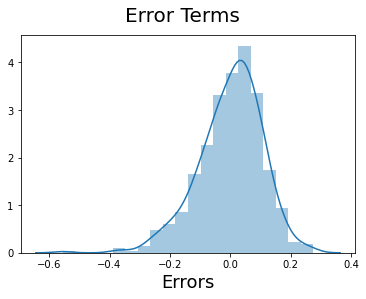

In [100]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_1 - y_train_cnt1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 6: Making Predictions Using the Final Model ( 1st Model )

#### Applying the scaling on the test sets

In [101]:
num_vars=['atemp','hum','windspeed','cnt']

bikes_d_test1[num_vars] = scaler.fit_transform(bikes_d_test1[num_vars])

In [102]:
bikes_d_test1.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.481313,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [103]:
y_test_1 = bikes_d_test1.pop('cnt')
X_test_1 = bikes_d_test1

In [104]:
X_train_new1 = X_train_lm.drop(['const'], axis=1)

In [105]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new1 = X_test_1[X_train_new1.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new1)

In [106]:
# Making predictions
y_pred_1 = lr_14.predict(X_test_new1)

## Step 7: Model Evaluation ( 1st Model )

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

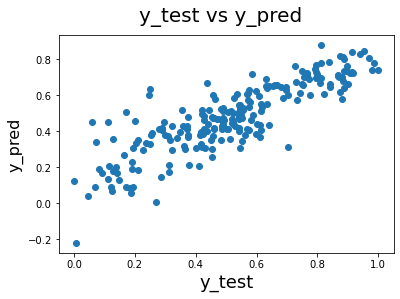

In [107]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test_1,y_pred_1)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Now we are done with model building and residual analysis, now let's calculate the R-squared score and RMSE of data set.

In [108]:
# Importing the required libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE ( 1st Model )

In [109]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test_1, y_pred_1))

0.12961133875931466

###### Checking the R-squared on the test set ( 1st Model )

In [110]:
#Calculate the r square for test

r_squared = r2_score(y_test_1, y_pred_1)
r_squared

0.7038154167181085

R-squared our model was: `0.774`

**Now moving on to Build the model using RFE method**

## Step 8: Splitting the Data into Training and Testing Sets ( 2nd Model )

In [111]:
#specifying this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bikes_d_train, bikes_d_test = train_test_split(bikes_d, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

In [112]:
# Applying scaler() to all the columns except the 'categorical' and 'dummy' variables
num_vars=['atemp','hum','windspeed','cnt']

bikes_d_train[num_vars] = scaler.fit_transform(bikes_d_train[num_vars])

In [113]:
bikes_d_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
bikes_d_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [115]:
y_train = bikes_d_train.pop('cnt')
X_train = bikes_d_train

## Step 9: Building our model using RFE (Recursive feature elimination) method

In [116]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [117]:
# Running RFE with the output number of the variable equal to 15.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)     
rfe = rfe.fit(X_train, y_train)

In [118]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 5),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 3),
 ('Sunday', False, 4),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 10),
 ('Jun', False, 7),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1)]

In [119]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'winter',
       'Light rain_Light snow_Thunderstorm', 'Mist_cloudy', 'Aug', 'Dec',
       'Feb', 'Jan', 'Nov', 'Sep'],
      dtype='object')

In [120]:
X_train.columns[~rfe.support_]

Index(['workingday', 'spring', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Jul', 'Jun', 'Mar', 'May', 'Oct'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [121]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [122]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [123]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe1).fit()   

In [124]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.26e-186
Time:                        15:59:58   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Looking at the `P-values` we can say all the variables are significant and we got R-squared value as `84%` thats a good indication 

let's also once check with the `VIF` to see how collinear are independent variables.

### Checking VIF

In [125]:
#Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
# Create a dataframe that will contain the names of feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.11
2,atemp,14.42
4,windspeed,3.89
6,winter,3.04
5,summer,2.28
8,Mist_cloudy,2.24
0,yr,2.06
12,Jan,1.92
13,Nov,1.85
10,Dec,1.63


By looking at the Features `hum` we can say that it is very high correlated with other Features, so let's drop this feature.

### Dropping the variable and updating the model

Taking VIF limit as `2` and dropping the `hum` as it has high VIF value.

In [127]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop(['hum'],axis=1)

In [128]:
# Building a model again.

X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_1 = sm.OLS(y_train,X_train_rfe1).fit()

In [129]:
#Let's see the summary of our linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.00e-184
Time:                        15:59:59   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     495   BIC:                            -905.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping `hum` here is a slight change in `R-squred value` or `adjR-squred value`,still the model is pretty good let's go ahead and check with VIF.

In [130]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.99
3,windspeed,3.83
5,winter,2.62
0,yr,2.06
4,summer,2.04
12,Nov,1.81
8,Aug,1.59
7,Mist_cloudy,1.57
9,Dec,1.41
13,Sep,1.35


### Dropping the Variable and Updating the Model

As we can see `atemp` has a high VIF value, but the p-value of the `atemp` is less but still we will drop this feature as this VIF is not acceptable.

In [131]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [132]:
# Building a model again.

X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_2 = sm.OLS(y_train,X_train_rfe1).fit()

In [133]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     127.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.20e-149
Time:                        16:00:00   Log-Likelihood:                 413.36
No. Observations:                 510   AIC:                            -798.7
Df Residuals:                     496   BIC:                            -739.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping `atemp` there is change in` R-squred value` or `adjR-squred value`, let's go ahead and check with VIF.

In [134]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.06
4,winter,2.49
0,yr,1.85
3,summer,1.80
11,Nov,1.80
6,Mist_cloudy,1.55
8,Dec,1.40
10,Jan,1.27
9,Feb,1.26
7,Aug,1.24


### Dropping the Variable and Updating the Mode

Dropping the `Windspeed` as this feature has high VIF value.

In [135]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [136]:
# Building a model again.

X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_3 = sm.OLS(y_train,X_train_rfe1).fit()

In [137]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     118.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.35e-137
Time:                        16:00:00   Log-Likelihood:                 382.62
No. Observations:                 510   AIC:                            -739.2
Df Residuals:                     497   BIC:                            -684.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping `windspeed` there is a change in` R-squred value` or `adjR-squred value`,still all the variables are significant let's go ahead and check with VIF.

In [138]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,2.39
10,Nov,1.77
0,yr,1.71
5,Mist_cloudy,1.53
7,Dec,1.37
2,summer,1.36
6,Aug,1.16
9,Jan,1.15
11,Sep,1.14
8,Feb,1.09


### Dropping the Variable and Updating the Mode

Dropping the `winter` as it has a high VIF value.

In [139]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [140]:
# Building a model again.

X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_4 = sm.OLS(y_train,X_train_rfe1).fit()

In [141]:
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     119.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.54e-132
Time:                        16:00:01   Log-Likelihood:                 367.80
No. Observations:                 510   AIC:                            -711.6
Df Residuals:                     498   BIC:                            -660.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

There is a slight change in `R-squred value` or `adjR-squred value`,still the model is pretty good let's go ahead and check with VIF.

In [142]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.63
4,Mist_cloudy,1.47
2,summer,1.33
5,Aug,1.15
8,Jan,1.14
9,Nov,1.13
10,Sep,1.13
6,Dec,1.10
7,Feb,1.08
1,holiday,1.06


### Dropping the Variable and Updating the Mode

As we can see above `summer` has very high P-value let's drop it.

In [143]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe=X_train_rfe.drop(['summer'],axis=1)

In [144]:
# Building a model again.

X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_5 = sm.OLS(y_train,X_train_rfe1).fit()

In [145]:
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     131.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          6.15e-133
Time:                        16:00:01   Log-Likelihood:                 367.70
No. Observations:                 510   AIC:                            -713.4
Df Residuals:                     499   BIC:                            -666.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping the `summer` there is no change in R-squred value.

In [146]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.42
3,Mist_cloudy,1.34
4,Aug,1.11
7,Jan,1.10
8,Nov,1.10
9,Sep,1.10
5,Dec,1.07
1,holiday,1.06
6,Feb,1.06
2,Light rain_Light snow_Thunderstorm,1.02


### Dropping the Variable and Updating the Mode

Adding `spring` to see will the model improves.

In [147]:
#Adding spring to see will the model improves or not.

X_train_rfe['spring']=X_train['spring']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,Aug,Dec,Feb,Jan,Nov,Sep,spring
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0,0,1,0,0,0,0,1
482,1,0,0,1,0,0,0,0,0,0,0


In [148]:
# Building a model again.

X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_6 = sm.OLS(y_train,X_train_rfe1).fit()

In [149]:
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     158.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.34e-154
Time:                        16:00:02   Log-Likelihood:                 421.62
No. Observations:                 510   AIC:                            -819.2
Df Residuals:                     498   BIC:                            -768.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After Adding `spring` the model has improved.

In [150]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,spring,3.13
7,Jan,2.12
6,Feb,1.84
0,yr,1.45
3,Mist_cloudy,1.35
5,Dec,1.14
4,Aug,1.12
8,Nov,1.11
9,Sep,1.10
1,holiday,1.06


### Dropping the Variable and Updating the Mode

Adding `Saturday` to see will the model improves.

In [151]:
#Adding Saturday to see will the model improves or not.
X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,Aug,Dec,Feb,Jan,Nov,Sep,spring,Saturday
653,1,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,0,0,0,0,0,0,1,0
728,1,0,0,0,0,1,0,0,0,0,1,0
482,1,0,0,1,0,0,0,0,0,0,0,0


In [152]:
# Building a model again.

X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_7 = sm.OLS(y_train,X_train_rfe1).fit()

In [153]:
#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.64e-154
Time:                        16:00:02   Log-Likelihood:                 422.46
No. Observations:                 510   AIC:                            -818.9
Df Residuals:                     497   BIC:                            -763.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After adding `Saturday`  there is increase in R-squired value but it has very high P-value so we need to drop it.

In [154]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,spring,3.15
7,Jan,2.12
6,Feb,1.84
0,yr,1.46
3,Mist_cloudy,1.37
5,Dec,1.14
4,Aug,1.12
11,Saturday,1.12
8,Nov,1.11
9,Sep,1.11


### Dropping the Variable and Updating the Mode

Dropping the `Saturday` as it has high P-value.

In [155]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [156]:
# Building a model again.

X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_8 = sm.OLS(y_train,X_train_rfe1).fit()

In [157]:
#Let's see the summary of our linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     158.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.34e-154
Time:                        16:00:03   Log-Likelihood:                 421.62
No. Observations:                 510   AIC:                            -819.2
Df Residuals:                     498   BIC:                            -768.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

As we can see after dropping `Saturday` there is not much difference in R-squred value, now lets try to add the `jun` and see what result we get.

In [158]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,spring,3.13
7,Jan,2.12
6,Feb,1.84
0,yr,1.45
3,Mist_cloudy,1.35
5,Dec,1.14
4,Aug,1.12
8,Nov,1.11
9,Sep,1.10
1,holiday,1.06


### Dropping the Variable and Updating the Mode

Adding the `Jun` variable to see will the model improves or not.

In [159]:
#Adding the Jun to see model will improve or not.

X_train_rfe['Jun']=X_train['Jun']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,Aug,Dec,Feb,Jan,Nov,Sep,spring,Jun
653,1,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,0,0,0,0,0,0,1,0
728,1,0,0,0,0,1,0,0,0,0,1,0
482,1,0,0,1,0,0,0,0,0,0,0,0


In [160]:
# Building a model again.

X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_9 = sm.OLS(y_train,X_train_rfe1).fit()

In [161]:
#Let's see the summary of our linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     148.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.01e-155
Time:                        16:00:03   Log-Likelihood:                 426.93
No. Observations:                 510   AIC:                            -827.9
Df Residuals:                     497   BIC:                            -772.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

As we expected it has `improved` the model slightly, let's check the VIF.

In [162]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,spring,3.14
7,Jan,2.12
6,Feb,1.84
0,yr,1.52
3,Mist_cloudy,1.36
5,Dec,1.15
4,Aug,1.12
8,Nov,1.11
9,Sep,1.11
1,holiday,1.06


### Dropping the Variable and Updating the Mode

Adding the `Mar` variable to see will the model improves or not

In [163]:
#Adding the Mar to see model will improve or not.

X_train_rfe['Mar']=X_train['Mar']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,Aug,Dec,Feb,Jan,Nov,Sep,spring,Jun,Mar
653,1,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,0,0,0,0,0,0,1,0,1
728,1,0,0,0,0,1,0,0,0,0,1,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0


In [164]:
# Building a model again.

X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_10 = sm.OLS(y_train,X_train_rfe1).fit()

In [165]:
#Let's see the summary of our linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     140.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.29e-157
Time:                        16:00:04   Log-Likelihood:                 432.12
No. Observations:                 510   AIC:                            -836.2
Df Residuals:                     496   BIC:                            -777.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

There is slightly increase in the R-squred value after adding `Mar`.

In [166]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,spring,6.06
7,Jan,3.35
6,Feb,2.75
12,Mar,2.14
0,yr,1.56
3,Mist_cloudy,1.39
5,Dec,1.29
4,Aug,1.13
8,Nov,1.12
9,Sep,1.12


### Dropping the Variable and Updating the Mode

Dropping the `Spring` variable as it has high VIF value.

In [167]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe=X_train_rfe.drop(['spring'],axis=1)

In [168]:
# Building a model again.

X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_11 = sm.OLS(y_train,X_train_rfe1).fit()

In [169]:
#Let's see the summary of our linear model
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     140.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.47e-151
Time:                        16:00:04   Log-Likelihood:                 415.68
No. Observations:                 510   AIC:                            -805.4
Df Residuals:                     497   BIC:                            -750.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After dropping the `spring` there is a slightly drop in R-squred value.

In [170]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.56
3,Mist_cloudy,1.38
4,Aug,1.13
7,Jan,1.12
8,Nov,1.12
9,Sep,1.12
11,Mar,1.11
5,Dec,1.08
6,Feb,1.07
1,holiday,1.06


### Dropping the Variable and Updating the Mode

Adding the `May` variable to see will the model will improves or not.

In [171]:
#Adding the May to see model will improve or not.

X_train_rfe['May']=X_train['May']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,Aug,Dec,Feb,Jan,Nov,Sep,Jun,Mar,May
653,1,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,0,0,0,0,0,0,0,1,0
728,1,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0


In [172]:
# Building a model again.

X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_12 = sm.OLS(y_train,X_train_rfe1).fit()

In [173]:
#Let's see the summary of our linear model
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     130.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.24e-150
Time:                        16:00:05   Log-Likelihood:                 417.42
No. Observations:                 510   AIC:                            -806.8
Df Residuals:                     496   BIC:                            -747.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After adding the `May` R-squred has incresed slightly but the P-value shows its insignificant.

In [174]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.63
3,Mist_cloudy,1.46
4,Aug,1.14
7,Jan,1.13
8,Nov,1.13
9,Sep,1.13
11,Mar,1.12
12,May,1.12
5,Dec,1.09
6,Feb,1.08


### Dropping the Variable and Updating the Mode

Dropping the `May` as it has high p-value.

In [175]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe=X_train_rfe.drop(['May'],axis=1)

In [176]:
# Building a model again.

X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our model
lm_13 = sm.OLS(y_train,X_train_rfe1).fit()

In [177]:
#Let's see the summary of our linear model
print(lm_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     140.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.47e-151
Time:                        16:00:05   Log-Likelihood:                 415.68
No. Observations:                 510   AIC:                            -805.4
Df Residuals:                     497   BIC:                            -750.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [178]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.56
3,Mist_cloudy,1.38
4,Aug,1.13
7,Jan,1.12
8,Nov,1.12
9,Sep,1.12
11,Mar,1.11
5,Dec,1.08
6,Feb,1.07
1,holiday,1.06


### Dropping the Variable and Updating the Mode

Adding the `Monday` variable to will the model improves.

In [179]:
#adding the Monday to see will the model improves.
X_train_rfe['Monday']=X_train['Monday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,Aug,Dec,Feb,Jan,Nov,Sep,Jun,Mar,Monday
653,1,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,0,0,0,0,0,0,0,1,0
728,1,0,0,0,0,1,0,0,0,0,0,0,1
482,1,0,0,1,0,0,0,0,0,0,0,0,0


In [180]:
# Building a model again.

X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_14 = sm.OLS(y_train,X_train_rfe1).fit()

In [181]:
#Let's see the summary of our linear model
print(lm_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     131.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.50e-151
Time:                        16:00:05   Log-Likelihood:                 419.60
No. Observations:                 510   AIC:                            -811.2
Df Residuals:                     496   BIC:                            -751.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After adding `Monday` model has improved slightly.

In [182]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.57
3,Mist_cloudy,1.39
4,Aug,1.14
12,Monday,1.14
7,Jan,1.13
8,Nov,1.13
9,Sep,1.12
11,Mar,1.11
5,Dec,1.10
6,Feb,1.08


### Dropping the Variable and Updating the Mode

Adding the `Tuesday` variable to will the model improves.

In [183]:
#adding the Tuesday to see will the model improves.
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,Aug,Dec,Feb,Jan,Nov,Sep,Jun,Mar,Monday,Tuesday
653,1,0,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,0,0,0,0,0,0,0,1,0,0
728,1,0,0,0,0,1,0,0,0,0,0,0,1,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [184]:
# Building a model again.

X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_15 = sm.OLS(y_train,X_train_rfe1).fit()

In [185]:
#Let's see the summary of our linear model
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     124.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          9.05e-152
Time:                        16:00:06   Log-Likelihood:                 422.68
No. Observations:                 510   AIC:                            -815.4
Df Residuals:                     495   BIC:                            -751.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After adding `Tuesday` model has improved slightly.

In [186]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.61
3,Mist_cloudy,1.39
12,Monday,1.16
13,Tuesday,1.16
4,Aug,1.14
7,Jan,1.14
8,Nov,1.14
9,Sep,1.12
11,Mar,1.12
5,Dec,1.10


### Dropping the Variable and Updating the Mode

Adding the `Wednesday` variable to will the model improves.

In [187]:
#adding the Wednesday to see will the model improves.
X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,Aug,Dec,Feb,Jan,Nov,Sep,Jun,Mar,Monday,Tuesday,Wednesday
653,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [188]:
# Building a model again.
X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_16 = sm.OLS(y_train,X_train_rfe1).fit()

In [189]:
#Let's see the summary of our linear model
print(lm_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     115.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.39e-151
Time:                        16:00:06   Log-Likelihood:                 423.02
No. Observations:                 510   AIC:                            -814.0
Df Residuals:                     494   BIC:                            -746.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After adding `Tuesday` model has improved slightly but it has high P-value.

In [190]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.65
3,Mist_cloudy,1.41
14,Wednesday,1.21
12,Monday,1.18
13,Tuesday,1.18
4,Aug,1.15
7,Jan,1.15
8,Nov,1.14
9,Sep,1.13
11,Mar,1.12


### Dropping the Variable and Updating the Mode

Dropping `Wednesday` as it has high P-value.

In [191]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)

In [192]:
# Building a model again.
X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_17 = sm.OLS(y_train,X_train_rfe1).fit()

In [193]:
#Let's see the summary of our linear model
print(lm_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     124.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          9.05e-152
Time:                        16:00:07   Log-Likelihood:                 422.68
No. Observations:                 510   AIC:                            -815.4
Df Residuals:                     495   BIC:                            -751.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [194]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.61
3,Mist_cloudy,1.39
12,Monday,1.16
13,Tuesday,1.16
4,Aug,1.14
7,Jan,1.14
8,Nov,1.14
9,Sep,1.12
11,Mar,1.12
5,Dec,1.10


### Dropping the Variable and Updating the Mode

Adding `Thursday` to see will the model improves or not.

In [195]:
#adding the Thursday to see will the model improves.
X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,Aug,Dec,Feb,Jan,Nov,Sep,Jun,Mar,Monday,Tuesday,Thursday
653,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [196]:
# Building a model again.
X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_18 = sm.OLS(y_train,X_train_rfe1).fit()

In [197]:
#Let's see the summary of our linear model
print(lm_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     115.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.37e-151
Time:                        16:00:07   Log-Likelihood:                 422.89
No. Observations:                 510   AIC:                            -813.8
Df Residuals:                     494   BIC:                            -746.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After adding `Thursday` model has improved slightly but it has high P-value.

In [198]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
3,Mist_cloudy,1.40
12,Monday,1.18
13,Tuesday,1.18
14,Thursday,1.17
4,Aug,1.15
8,Nov,1.15
7,Jan,1.14
9,Sep,1.13
11,Mar,1.13


### Dropping the Variable and Updating the Mode

Dropping `Thursday` as it has high P-value.

In [199]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe=X_train_rfe.drop(['Thursday'],axis=1)

In [200]:
# Building a model again.
X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_19 = sm.OLS(y_train,X_train_rfe1).fit()

In [201]:
#Let's see the summary of our linear model
print(lm_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     124.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          9.05e-152
Time:                        16:00:08   Log-Likelihood:                 422.68
No. Observations:                 510   AIC:                            -815.4
Df Residuals:                     495   BIC:                            -751.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [202]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.61
3,Mist_cloudy,1.39
12,Monday,1.16
13,Tuesday,1.16
4,Aug,1.14
7,Jan,1.14
8,Nov,1.14
9,Sep,1.12
11,Mar,1.12
5,Dec,1.10


### Dropping the Variable and Updating the Mode

Adding the `Oct` variable to will the model improves.

In [203]:
#adding the Aug to see will the model improves.
X_train_rfe['Oct']=X_train['Oct']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,Aug,Dec,Feb,Jan,Nov,Sep,Jun,Mar,Monday,Tuesday,Oct
653,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [204]:
# Building a model again.
X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_20 = sm.OLS(y_train,X_train_rfe1).fit()

In [205]:
#Let's see the summary of our linear model
print(lm_20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     116.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.56e-151
Time:                        16:00:08   Log-Likelihood:                 423.52
No. Observations:                 510   AIC:                            -815.0
Df Residuals:                     494   BIC:                            -747.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After adding `Oct` model improves slightly but it has high P-value.

In [206]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.67
3,Mist_cloudy,1.44
12,Monday,1.18
14,Oct,1.18
13,Tuesday,1.17
4,Aug,1.16
8,Nov,1.16
7,Jan,1.15
9,Sep,1.14
11,Mar,1.13


### Dropping the Variable and Updating the Mode

Dropping the `Oct` variable as in has high P-value.

In [207]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe=X_train_rfe.drop(['Oct'],axis=1)

In [208]:
# Building a model again.
X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_21 = sm.OLS(y_train,X_train_rfe1).fit()

In [209]:
#Let's see the summary of our linear model
print(lm_21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     124.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          9.05e-152
Time:                        16:00:09   Log-Likelihood:                 422.68
No. Observations:                 510   AIC:                            -815.4
Df Residuals:                     495   BIC:                            -751.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [210]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.61
3,Mist_cloudy,1.39
12,Monday,1.16
13,Tuesday,1.16
4,Aug,1.14
7,Jan,1.14
8,Nov,1.14
9,Sep,1.12
11,Mar,1.12
5,Dec,1.10


### Dropping the Variable and Updating the Mode

Adding the `Jul` variable to see will the model improves.

In [211]:
#adding the Jul to see will the model improves.
X_train_rfe['Jul']=X_train['Jul']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,Aug,Dec,Feb,Jan,Nov,Sep,Jun,Mar,Monday,Tuesday,Jul
653,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
728,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [212]:
# Building a model again.
X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_22 = sm.OLS(y_train,X_train_rfe1).fit()

In [213]:
#Let's see the summary of our linear model
print(lm_22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     117.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.11e-151
Time:                        16:00:09   Log-Likelihood:                 424.99
No. Observations:                 510   AIC:                            -818.0
Df Residuals:                     494   BIC:                            -750.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

After adding `Jul` model has improved slightly

In [214]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.69
3,Mist_cloudy,1.40
12,Monday,1.18
13,Tuesday,1.18
4,Aug,1.15
7,Jan,1.15
8,Nov,1.15
9,Sep,1.13
11,Mar,1.13
5,Dec,1.11


### Dropping the Variable and Updating the Mode

Adding the `Sunday` variable to see will the model improves.

In [215]:
#adding the Sunday to see will the model improves.
X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,Aug,Dec,Feb,Jan,Nov,Sep,Jun,Mar,Monday,Tuesday,Jul,Sunday
653,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
728,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [216]:
# Building a model again.
X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model 
lm_23 = sm.OLS(y_train,X_train_rfe1).fit()

In [217]:
#Let's see the summary of our linear model
print(lm_23.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     109.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.14e-150
Time:                        16:00:10   Log-Likelihood:                 425.06
No. Observations:                 510   AIC:                            -816.1
Df Residuals:                     493   BIC:                            -744.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [218]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.71
3,Mist_cloudy,1.42
15,Sunday,1.22
12,Monday,1.21
13,Tuesday,1.21
4,Aug,1.16
7,Jan,1.15
8,Nov,1.15
5,Dec,1.14
9,Sep,1.14


### Dropping the Variable and Updating the Mode

Dropping the `Sunday` variable as in has high P-value.

In [219]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe=X_train_rfe.drop(['Sunday'],axis=1)

In [220]:
# Building a model again.
X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_24 = sm.OLS(y_train,X_train_rfe1).fit()

In [221]:
#Let's see the summary of our linear model
print(lm_24.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     117.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.11e-151
Time:                        16:00:10   Log-Likelihood:                 424.99
No. Observations:                 510   AIC:                            -818.0
Df Residuals:                     494   BIC:                            -750.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [222]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.69
3,Mist_cloudy,1.40
12,Monday,1.18
13,Tuesday,1.18
4,Aug,1.15
7,Jan,1.15
8,Nov,1.15
9,Sep,1.13
11,Mar,1.13
5,Dec,1.11


### Dropping the Variable and Updating the Mode

Adding `workingday` to see will the model improves or not

In [223]:
#adding the workingday to see will the model improves.
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,yr,holiday,Light rain_Light snow_Thunderstorm,Mist_cloudy,Aug,Dec,Feb,Jan,Nov,Sep,Jun,Mar,Monday,Tuesday,Jul,workingday
653,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
576,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
426,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
482,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [224]:
# Building a model again.
X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our model
lm_25 = sm.OLS(y_train,X_train_rfe1).fit()

In [225]:
#Let's see the summary of our linear model
print(lm_25.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     109.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.08e-150
Time:                        16:00:11   Log-Likelihood:                 425.12
No. Observations:                 510   AIC:                            -816.2
Df Residuals:                     493   BIC:                            -744.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [226]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,workingday,3.16
0,yr,1.80
3,Mist_cloudy,1.42
12,Monday,1.38
13,Tuesday,1.37
8,Nov,1.23
4,Aug,1.21
7,Jan,1.20
11,Mar,1.19
9,Sep,1.18


### Dropping the Variable and Updating the Mode

Dropping the `workingday` as it has high p-value as well as high VIF value.

In [227]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [228]:
# Building a model again.
X_train_rfe1 = sm.add_constant(X_train_rfe)

#Running our new model
lm_26 = sm.OLS(y_train,X_train_rfe1).fit()

In [229]:
#Let's see the summary of our linear model
print(lm_26.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     117.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.11e-151
Time:                        16:00:11   Log-Likelihood:                 424.99
No. Observations:                 510   AIC:                            -818.0
Df Residuals:                     494   BIC:                            -750.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [230]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.69
3,Mist_cloudy,1.40
12,Monday,1.18
13,Tuesday,1.18
4,Aug,1.15
7,Jan,1.15
8,Nov,1.15
9,Sep,1.13
11,Mar,1.13
5,Dec,1.11


After adding and eliminating all the variables we found `Model26` is good, So we go ahead and make our predictions using this model only.

## Step 10: Residual Analysis of the train data ( 2nd Model )

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [231]:
y_train_cnt = lm_26.predict(X_train_rfe1)

In [232]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

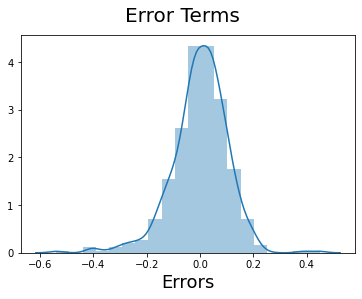

In [233]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 11: Making Predictions Using the Final Model ( 2nd Model )



#### Applying the scaling on the test sets

In [234]:
num_vars=['atemp','hum','windspeed','cnt']

bikes_d_test[num_vars] = scaler.fit_transform(bikes_d_test[num_vars])

In [235]:
bikes_d_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,0.232877,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.481313,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,0.423633,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [236]:
y_test = bikes_d_test.pop('cnt')
X_test = bikes_d_test

In [237]:
X_train_new=X_train_rfe1.drop(['const'], axis=1)

In [238]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [239]:
# Making predictions
y_pred = lm_26.predict(X_test_new)

## Step 12 : Model Evaluation ( 2nd Model )

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

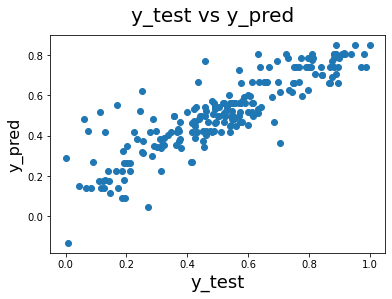

In [240]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

**By seeing the above plot we can say that our model is good enough to predict the demand of the bikes, this model will help the managment to make further business strategy.**

Now we are done with model building and residual analysis, now let's calculate the R-squred score  and RMSE of test data set.

In [241]:
# Importing the required libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE of ( 2nd Model )

In [242]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.11753570310872746

###### Checking the R-squared on the test set ( 2nd Model )

In [243]:
#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.7564343299275704

R-squared our model was: `0.780`

**Now looking at the RMSE values of both the models 1st model: `0.12961133875931466` and 2n model: `0.11753570310872746`, we can see RFE model has low RMSE value then the 1st model this show RFE has helped use in feature selection process and we can select this as our final model.**

# Conclusion

In [244]:
#This was our final model

print(lm_26.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     117.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.11e-151
Time:                        16:00:13   Log-Likelihood:                 424.99
No. Observations:                 510   AIC:                            -818.0
Df Residuals:                     494   BIC:                            -750.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

**We can see that the equation of our best fitted line is:**

$ cnt = 0.2447  \times  yr - 0.0937  \times  holiday - 0.3058 \times Lightrain,LightsnowThunderstorm - 0.0807 \times Mistcloudy + 0.0667 \times Aug - 0.1466 \times Dec - 0.2748 \times Feb - 0.3245 \times Jan - 0.0752 \times Nov + 0.1063 \times Sep + 0.0635 \times Jun - 0.1507 \times Mar - 0.0432 \times Monday - 0.0338 \times Tuesday + 0.0419 \times Jul $

**Main feature affecting the demands of the bikes**

Demand of the bikes increases: yr, Aug, Sep, Jun, Jul

Demand of the bikes decreases: Light rain_Light snow_Thunderstorm, Feb, Mar, Dec, Jan